C:\Users\student\AppData\Local\Temp\ipykernel_11360\3974845402.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df.resample('M', on='交易年月日')['單價元/坪'].mean().reset_index()
19:08:38 - cmdstanpy - INFO - Chain [1] start processing
19:08:38 - cmdstanpy - INFO - Chain [1] done processing


均方誤差 (MSE): 40854406.83238046
決定係數 (R²): 0.6874701770129736


c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


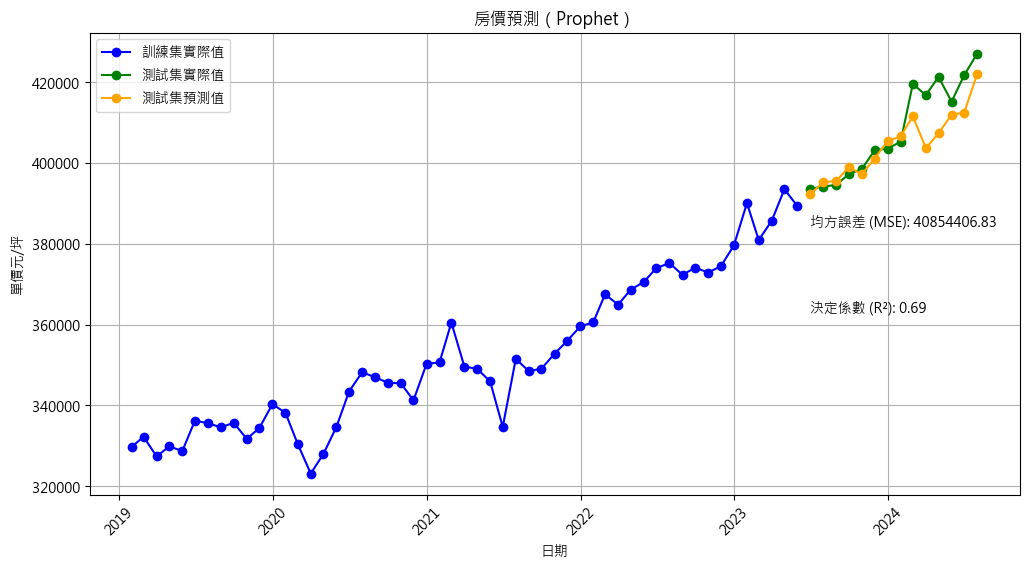

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

# 讀取資料
df = pd.read_csv(r'北北桃5_filter_outlier.csv')

# 清理房價資料
df = df[df['總價元'] < 1000000000]
df = df[df['土地移轉總面積平方公尺'] < 20000]
df = df[df['單價元/坪'] > 0]

# 確認日期格式
df['交易年月日'] = pd.to_datetime(df['交易年月日'], format='%Y-%m-%d')

# 計算每月平均單價
monthly_avg = df.resample('M', on='交易年月日')['單價元/坪'].mean().reset_index()
monthly_avg.rename(columns={'交易年月日': 'ds', '單價元/坪': 'y'}, inplace=True)

# 將資料分為訓練集和測試集
train_size = int(len(monthly_avg) * 0.8)
train_df = monthly_avg[:train_size]
test_df = monthly_avg[train_size:]

# 建立 Prophet 模型並擬合訓練資料
model = Prophet()
model.fit(train_df)

# 使用測試集時間段進行預測
future = model.make_future_dataframe(periods=len(test_df), freq='M')
forecast = model.predict(future)

# 提取預測值和實際值
forecast_test = forecast[-len(test_df):]  # 獲取測試集對應的預測值
test_df = test_df.reset_index(drop=True)
y_true = test_df['y']
y_pred = forecast_test['yhat']

# 計算 MSE 和 R² 分數
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"均方誤差 (MSE): {mse}")
print(f"決定係數 (R²): {r2}")

# 繪製實際值與預測值對比圖
plt.figure(figsize=(12, 6))
plt.plot(train_df['ds'], train_df['y'], label='訓練集實際值', color='blue', marker='o')
plt.plot(test_df['ds'], y_true, label='測試集實際值', color='green', marker='o')
plt.plot(test_df['ds'], y_pred, label='測試集預測值', color='orange', marker='o')



# 在圖中添加 MSE 和 R² 的文本
plt.text(x=test_df['ds'].iloc[0], y=max(y_true)*0.9, 
         s=f'均方誤差 (MSE): {mse:.2f}', 
         fontsize=10, color='black', ha='left')

plt.text(x=test_df['ds'].iloc[0], y=max(y_true)*0.85, 
         s=f'決定係數 (R²): {r2:.2f}', 
         fontsize=10, color='black', ha='left')

plt.title('房價預測（Prophet）')
plt.xlabel('日期')
plt.ylabel('單價元/坪')
plt.xticks(rotation=45)  # 讓日期顯示更清晰
plt.legend()
plt.grid()  # 添加網格線以方便觀看
plt.show()



C:\Users\student\AppData\Local\Temp\ipykernel_11360\2578467993.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df.resample('M', on='交易年月日')['單價元/坪'].mean().reset_index()
19:15:40 - cmdstanpy - INFO - Chain [1] start processing
19:15:40 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


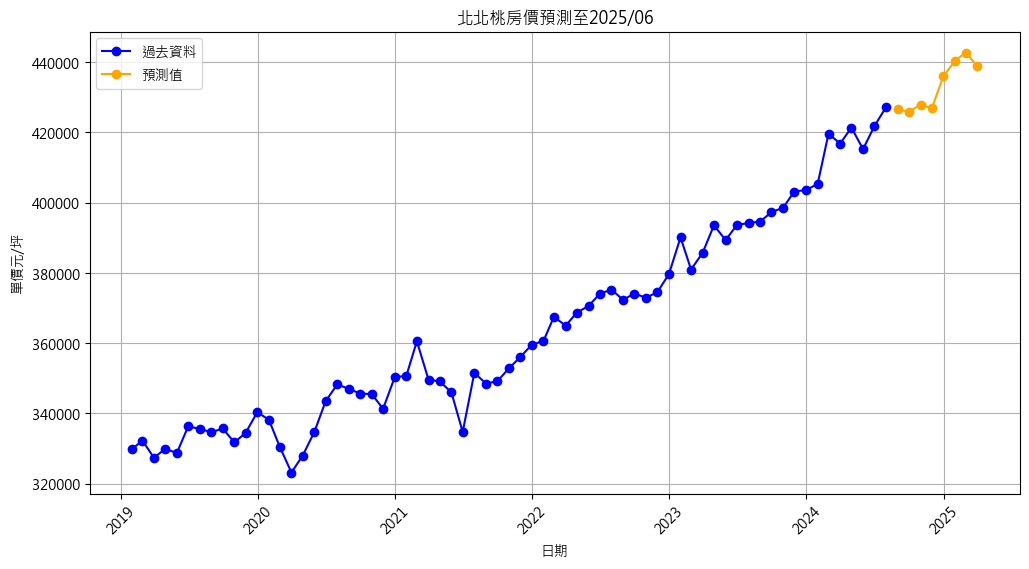

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

# 讀取資料
df = pd.read_csv(r'北北桃5_filter_outlier.csv')

# 清理房價資料
df = df[df['總價元'] < 1000000000]
df = df[df['土地移轉總面積平方公尺'] < 20000]
df = df[df['單價元/坪'] > 0]

# 確認日期格式
df['交易年月日'] = pd.to_datetime(df['交易年月日'], format='%Y-%m-%d')

# 計算每月平均單價
monthly_avg = df.resample('M', on='交易年月日')['單價元/坪'].mean().reset_index()
monthly_avg.rename(columns={'交易年月日': 'ds', '單價元/坪': 'y'}, inplace=True)

# 建立 Prophet 模型並擬合資料
model = Prophet()
model.fit(monthly_avg)

# 生成未來日期，直到明年六月
future = model.make_future_dataframe(periods=8, freq='M')  # 8个月，从当前日期到明年六月
forecast = model.predict(future)

# 提取預測值
y_pred = forecast['yhat']

# 繪製實際值
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg['ds'], monthly_avg['y'], label='過去資料', color='blue', marker='o')

# 繪製未來的預測值
plt.plot(forecast['ds'][len(monthly_avg):], y_pred[len(monthly_avg):], label='預測值', color='orange', marker='o')



# 添加 MSE 和 R² 的文本（仅针对已知数据计算）
y_true = monthly_avg['y']
mse = mean_squared_error(y_true, y_pred[:len(y_true)])  # 仅计算已知数据的 MSE
r2 = r2_score(y_true, y_pred[:len(y_true)])  # 仅计算已知数据的 R²


plt.title('北北桃房價預測至2025/06')
plt.xlabel('日期')
plt.ylabel('單價元/坪')
plt.xticks(rotation=45)  # 讓日期顯示更清晰
plt.legend()
plt.grid()  # 添加網格線以方便觀看
plt.show()


In [22]:
import pandas as pd
from prophet import Prophet

# 读取数据
df = pd.read_csv(r'北北桃5_filter_outlier.csv')

# 清理房价数据
df = df[df['總價元'] < 1000000000]
df = df[df['土地移轉總面積平方公尺'] < 20000]
df = df[df['單價元/坪'] > 0]

# 确认日期格式
df['交易年月日'] = pd.to_datetime(df['交易年月日'], format='%Y-%m-%d')

# 只选择台北市的数据
taipei_data = df[df['縣市'] == '台北市']

# 初始化结果列表
results = []

# 对每个乡镇市区进行预测
for area in taipei_data['鄉鎮市區'].unique():
    area_data = taipei_data[taipei_data['鄉鎮市區'] == area]

    # 计算每月平均单价
    monthly_avg = area_data.resample('M', on='交易年月日')['單價元/坪'].mean().reset_index()
    monthly_avg.rename(columns={'交易年月日': 'ds', '單價元/坪': 'y'}, inplace=True)

    # 如果月数不足，则跳过该区域
    if len(monthly_avg) < 6:  # 需要至少6个月的数据来计算6个月涨幅
        continue

    # 创建 Prophet 模型并拟合数据
    model = Prophet()
    model.fit(monthly_avg)

    # 生成未来日期，直到明年六月
    future = model.make_future_dataframe(periods=11, freq='M')  # 8个月，从当前日期到明年六月
    forecast = model.predict(future)

    # 过滤出2024年9月以后的数据
    forecast = forecast[forecast['ds'] >= '2024-09-01']

    # 计算三个月和六个月的百分比涨幅
    if len(forecast) >= 6:
        forecast['三個月漲幅'] = ((forecast['yhat'] - forecast['yhat'].shift(3)) / forecast['yhat']) * 100  # 三个月百分比涨幅
        forecast['六個月漲幅'] = ((forecast['yhat'] - forecast['yhat'].shift(6)) / forecast['yhat']) * 100  # 六个月百分比涨幅

    # 将预测结果添加到结果列表中
    for index, row in forecast.iterrows():
        results.append({
            '縣市': '台北市',
            '鄉鎮市區': area,
            '日期': row['ds'],
            '預測單價元/坪': row['yhat'],
            '三個月漲幅': row['三個月漲幅'],
            '六個月漲幅': row['六個月漲幅']
        })

# 将结果转换为 DataFrame
results_df = pd.DataFrame(results)

# 保存到 CSV 文件
results_df.to_csv('台北市鄉鎮市區未來房價預測及漲幅.csv', index=False, encoding='utf-8-sig')







C:\Users\student\AppData\Local\Temp\ipykernel_11360\1553536724.py:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = area_data.resample('M', on='交易年月日')['單價元/坪'].mean().reset_index()
19:34:52 - cmdstanpy - INFO - Chain [1] start processing
19:34:52 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
C:\Users\student\AppData\Local\Temp\ipykernel_11360\1553536724.py:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = area_data.resample('M', on='交易年月日')['單價元/坪'].mean().reset_index()
19:34:52 - cmdstanpy - INFO - Chain [1] start processing
19:34:52 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\student\AppData\Local\Programs\Pytho